In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('Titanic-Dataset.csv')
df = pd.DataFrame(data)
df = df.drop(['PassengerId','Ticket'],axis=1)
train_data = df

In [3]:
#X[:,2].reshape(len(X),1)

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

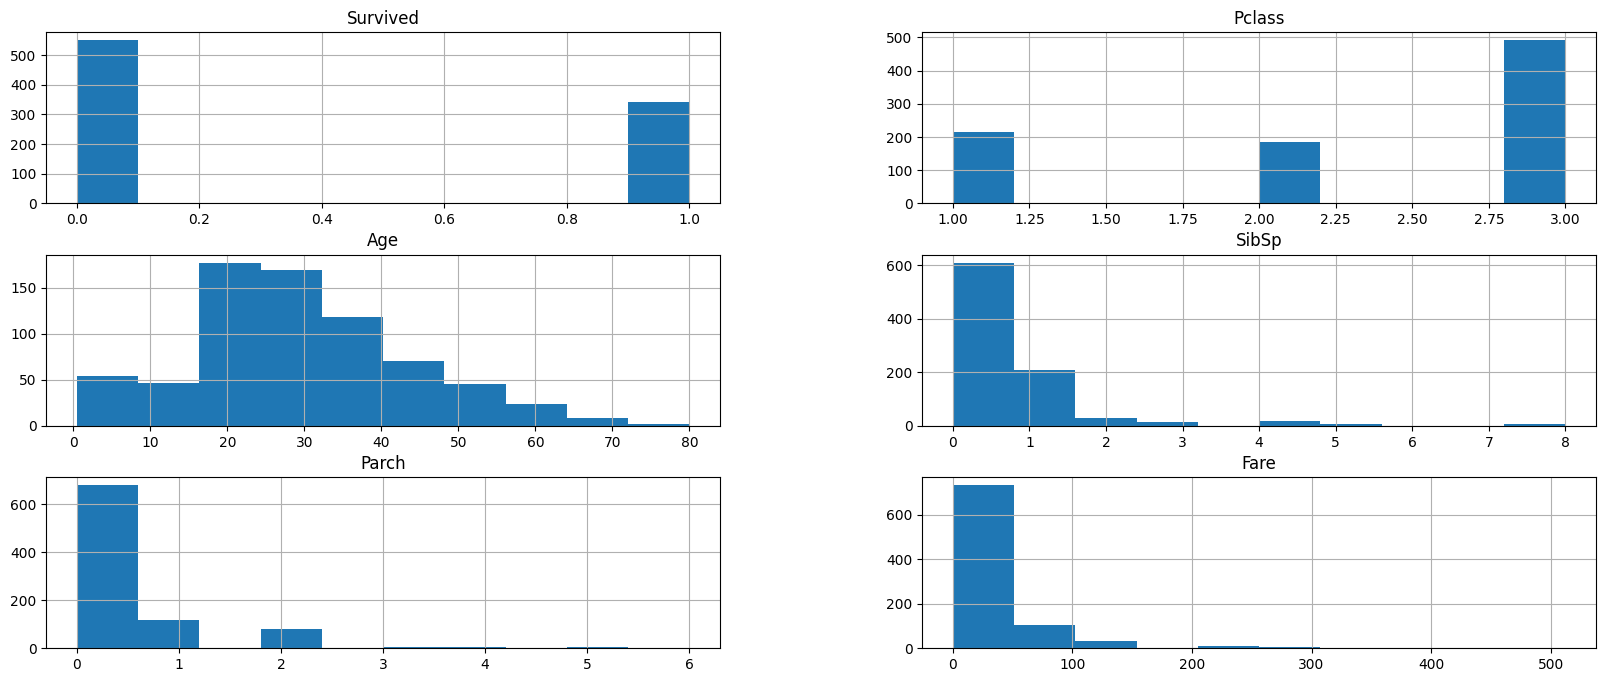

In [4]:
train_data.hist(figsize = (20,8))

In [5]:
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C


In [6]:
train_data.drop(['Name','Cabin'], axis=1, inplace=True)

In [7]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [8]:
train_data = pd.get_dummies(data=train_data, columns=['Pclass','Sex','Embarked'])

In [9]:
train_data

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,False,False,True,False,True,False,False,True
1,1,38.0,1,0,71.2833,True,False,False,True,False,True,False,False
2,1,26.0,0,0,7.9250,False,False,True,True,False,False,False,True
3,1,35.0,1,0,53.1000,True,False,False,True,False,False,False,True
4,0,35.0,0,0,8.0500,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,False,True,False,False,True,False,False,True
887,1,19.0,0,0,30.0000,True,False,False,True,False,False,False,True
888,0,NaN,1,2,23.4500,False,False,True,True,False,False,False,True
889,1,26.0,0,0,30.0000,True,False,False,False,True,True,False,False


In [10]:
train_data.corr()['Survived']

Survived      1.000000
Age          -0.077221
SibSp        -0.035322
Parch         0.081629
Fare          0.257307
Pclass_1      0.285904
Pclass_2      0.093349
Pclass_3     -0.322308
Sex_female    0.543351
Sex_male     -0.543351
Embarked_C    0.168240
Embarked_Q    0.003650
Embarked_S   -0.155660
Name: Survived, dtype: float64

<Axes: >

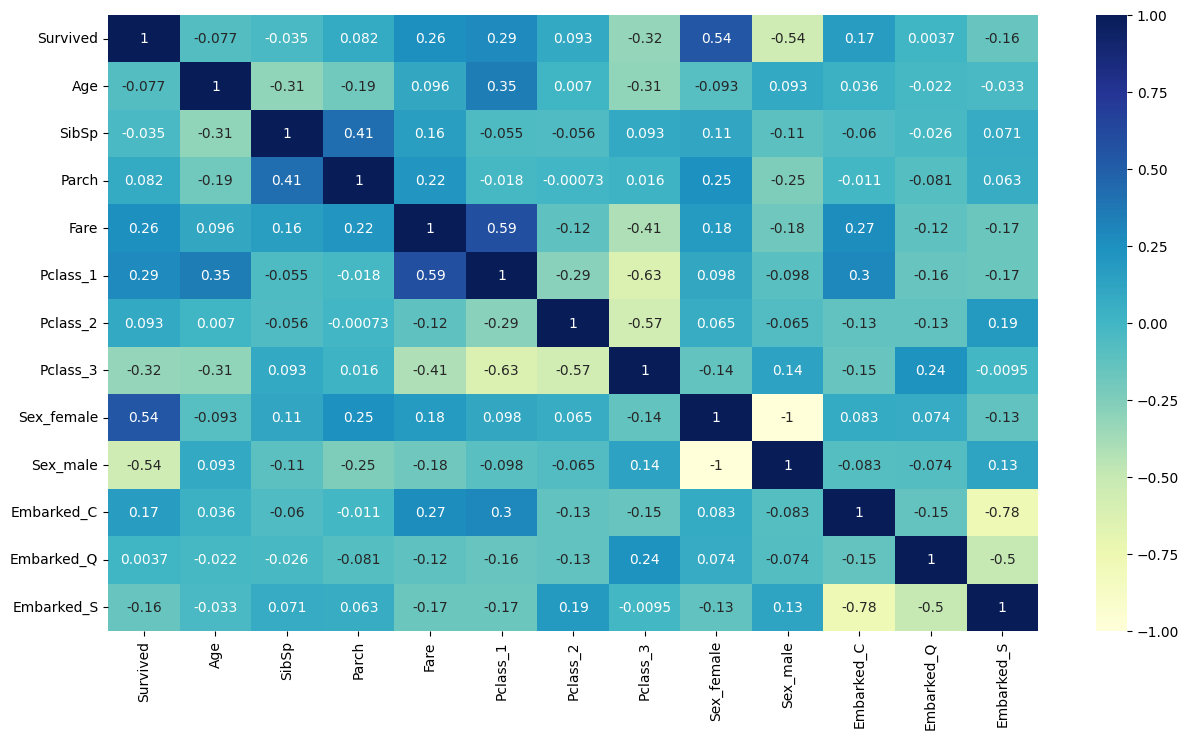

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [12]:
train_data['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [13]:
train_data.isna().sum()

Survived        0
Age           177
SibSp           0
Parch           0
Fare            0
Pclass_1        0
Pclass_2        0
Pclass_3        0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [14]:
train_data = train_data.fillna(40)  #this is because only age has nan and the average age is 40 so filling nan with 40
y = train_data['Survived'].to_numpy()
y = y.reshape(len(y),1)
X = train_data.drop(['Survived'],axis=1)
x = np.hstack([np.ones_like(y),X])
m = x[:,1].size
n = x[1,:].size
theta = np.ones([n,1])

In [15]:
y.shape

(891, 1)

In [16]:
x.shape

(891, 13)

In [17]:
m

891

In [18]:
n

13

In [19]:
x.shape

(891, 13)

In [20]:
#feature normalization
x = x/x.max()

In [21]:
#sigmoid function
def sigmoid(x,theta):
    p = np.float32(x@theta)
    j = 1/(1+np.exp(-p))
    return j

In [22]:
#cost function
def computecost(x,y,theta):
    cost = (np.sum((-(y)*np.log(sigmoid(x,theta)))-((1-y)*np.log(1-sigmoid(x,theta))))**2)/m
    return cost

In [28]:
sig = sigmoid(x,theta)

array([[0.51670665],
       [0.55553645],
       [0.51849777],
       [0.54530513],
       [0.5229428 ],
       [0.5255756 ],
       [0.55340487],
       [0.51515895],
       [0.5215223 ],
       [0.5239267 ],
       [0.51302576],
       [0.54310226],
       [0.51563424],
       [0.53909165],
       [0.51261336],
       [0.53653234],
       [0.5195697 ],
       [0.5277855 ],
       [0.5263259 ],
       [0.5249753 ],
       [0.53167546],
       [0.5248658 ],
       [0.5131863 ],
       [0.53289026],
       [0.5180835 ],
       [0.5386612 ],
       [0.5249753 ],
       [0.63830024],
       [0.52529377],
       [0.5253018 ],
       [0.5349404 ],
       [0.5923826 ],
       [0.5252309 ],
       [0.5392007 ],
       [0.5559641 ],
       [0.548159  ],
       [0.5249774 ],
       [0.51612175],
       [0.5204832 ],
       [0.5147527 ],
       [0.526557  ],
       [0.5258392 ],
       [0.5253018 ],
       [0.52514774],
       [0.51506346],
       [0.52537686],
       [0.5294878 ],
       [0.525

In [32]:
#gradient descent algorithm
def gradient(x,y,theta,alpha=0.05, iteration=2000):
    j_history = np.zeros([iteration,1])

    for iter in range(0,iteration):
        error = (x@theta)-y
        theta = theta - alpha*((sigmoid(x,theta)-y)*x)
        j_history[iter] = computecost(x,y,theta)
    return theta,j_history

In [31]:
theta_try,costhist = gradient(x,y,theta)

ValueError: operands could not be broadcast together with shapes (13,1) (891,1) 

In [ ]:
costhist

In [ ]:
plt.plot(range(0,costhist.size),costhist)

rough

In [ ]:
#j = np.sum((-y*log())

In [ ]:
age = np.int32(train_data['Age'])

In [ ]:
train_data['Age'].isna().sum()

In [ ]:
np.hstack([np.ones_like(y),ar])

In [ ]:
ar = train_data['Age'].fillna(40)

In [ ]:
ar = np.int32(ar).reshape(y.shape)

In [ ]:
plt.xlabel('age')
plt.ylabel('survival')
plt.title('Age vs survival')
plt.plot(range(0,ar.max()),train_data['Survived'])

In [ ]:
#p = np.float32(x@theta)
#np.exp(p)

In [ ]:
x = x.float()